# Boston Housing

Nesse projeto, estaremos explorando alguns dados sobre as moradias na área de Boston. Trata-se de um dataset bastante conhecido, publicado originalmente no artigo `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Esse projeto é parte integrante da disciplina Aprendizado de Máquinas - XXI Escola de Verão - UFSC

Aluna: Ana Júlia Antunes Souza

# Obtendo os Dados e Observações Iniciais

Iniciamos o projeto fazendo algumas importações básicas, e fixando uma seed para que nossa solução tenha maior reproducibilidade.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
seed = 18
np.random.seed(seed)

Em seguida, o dataset será importado da biblioteca do sklearn. Esse dataset é bastante utilizado e pode ser encontrado em diversos formatos, mas optei por importá-lo do sklearn pela praticidade, e por não necessitar abrir um arquivo compactado.

In [ ]:
import sklearn.datasets
data = sklearn.datasets.load_boston()

Tranformamos o dataset em um DataFrame do Pandas, para que a manipulação seja mais fácil. Note que a coluna MEDV, que corresponde aos labels, não se encontra no mesmo local que as features, então adicionamos essa coluna posteriormente.

In [ ]:
boston = pd.DataFrame(data=data.data, columns=data.feature_names)

In [ ]:
boston['MEDV'] = data.target

Aqui, obtemos algumas informações sobre o dataset, sabendo-se que suas colunas representam as informações a seguir:

**CRIM**  -   per capita crime rate by town

**ZN**   -    proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**  -  proportion of non-retail business acres per town

**CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**   -   nitric oxides concentration (parts per 10 million)

**RM**   -   average number of rooms per dwelling

**AGE**   -   proportion of owner-occupied units built prior to 1940

**DIS**   -   weighted distances to five Boston employment centres

**RAD**    -  index of accessibility to radial highways

**TAX**     - full-value property-tax rate per 10,000 dollars

**PTRATIO** - pupil-teacher ratio by town

**B**     -  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT**   - % lower status of the population

**MEDV**   -  Median value of owner-occupied homes in $1000's

In [ ]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


A partir daqui, já sabemos que nosso dataset não tem dados faltantes, uma boa notícia! Além disso, temos apenas dados numéricos, então não precisaremos fazer nenhum tratamento com dados categóricos.

A seguir, utilizei a biblioteca do Seaborn para fazer um PairGrid, uma ferramenta capaz de plotar diversos gráficos, comparando as colunas duas a duas.

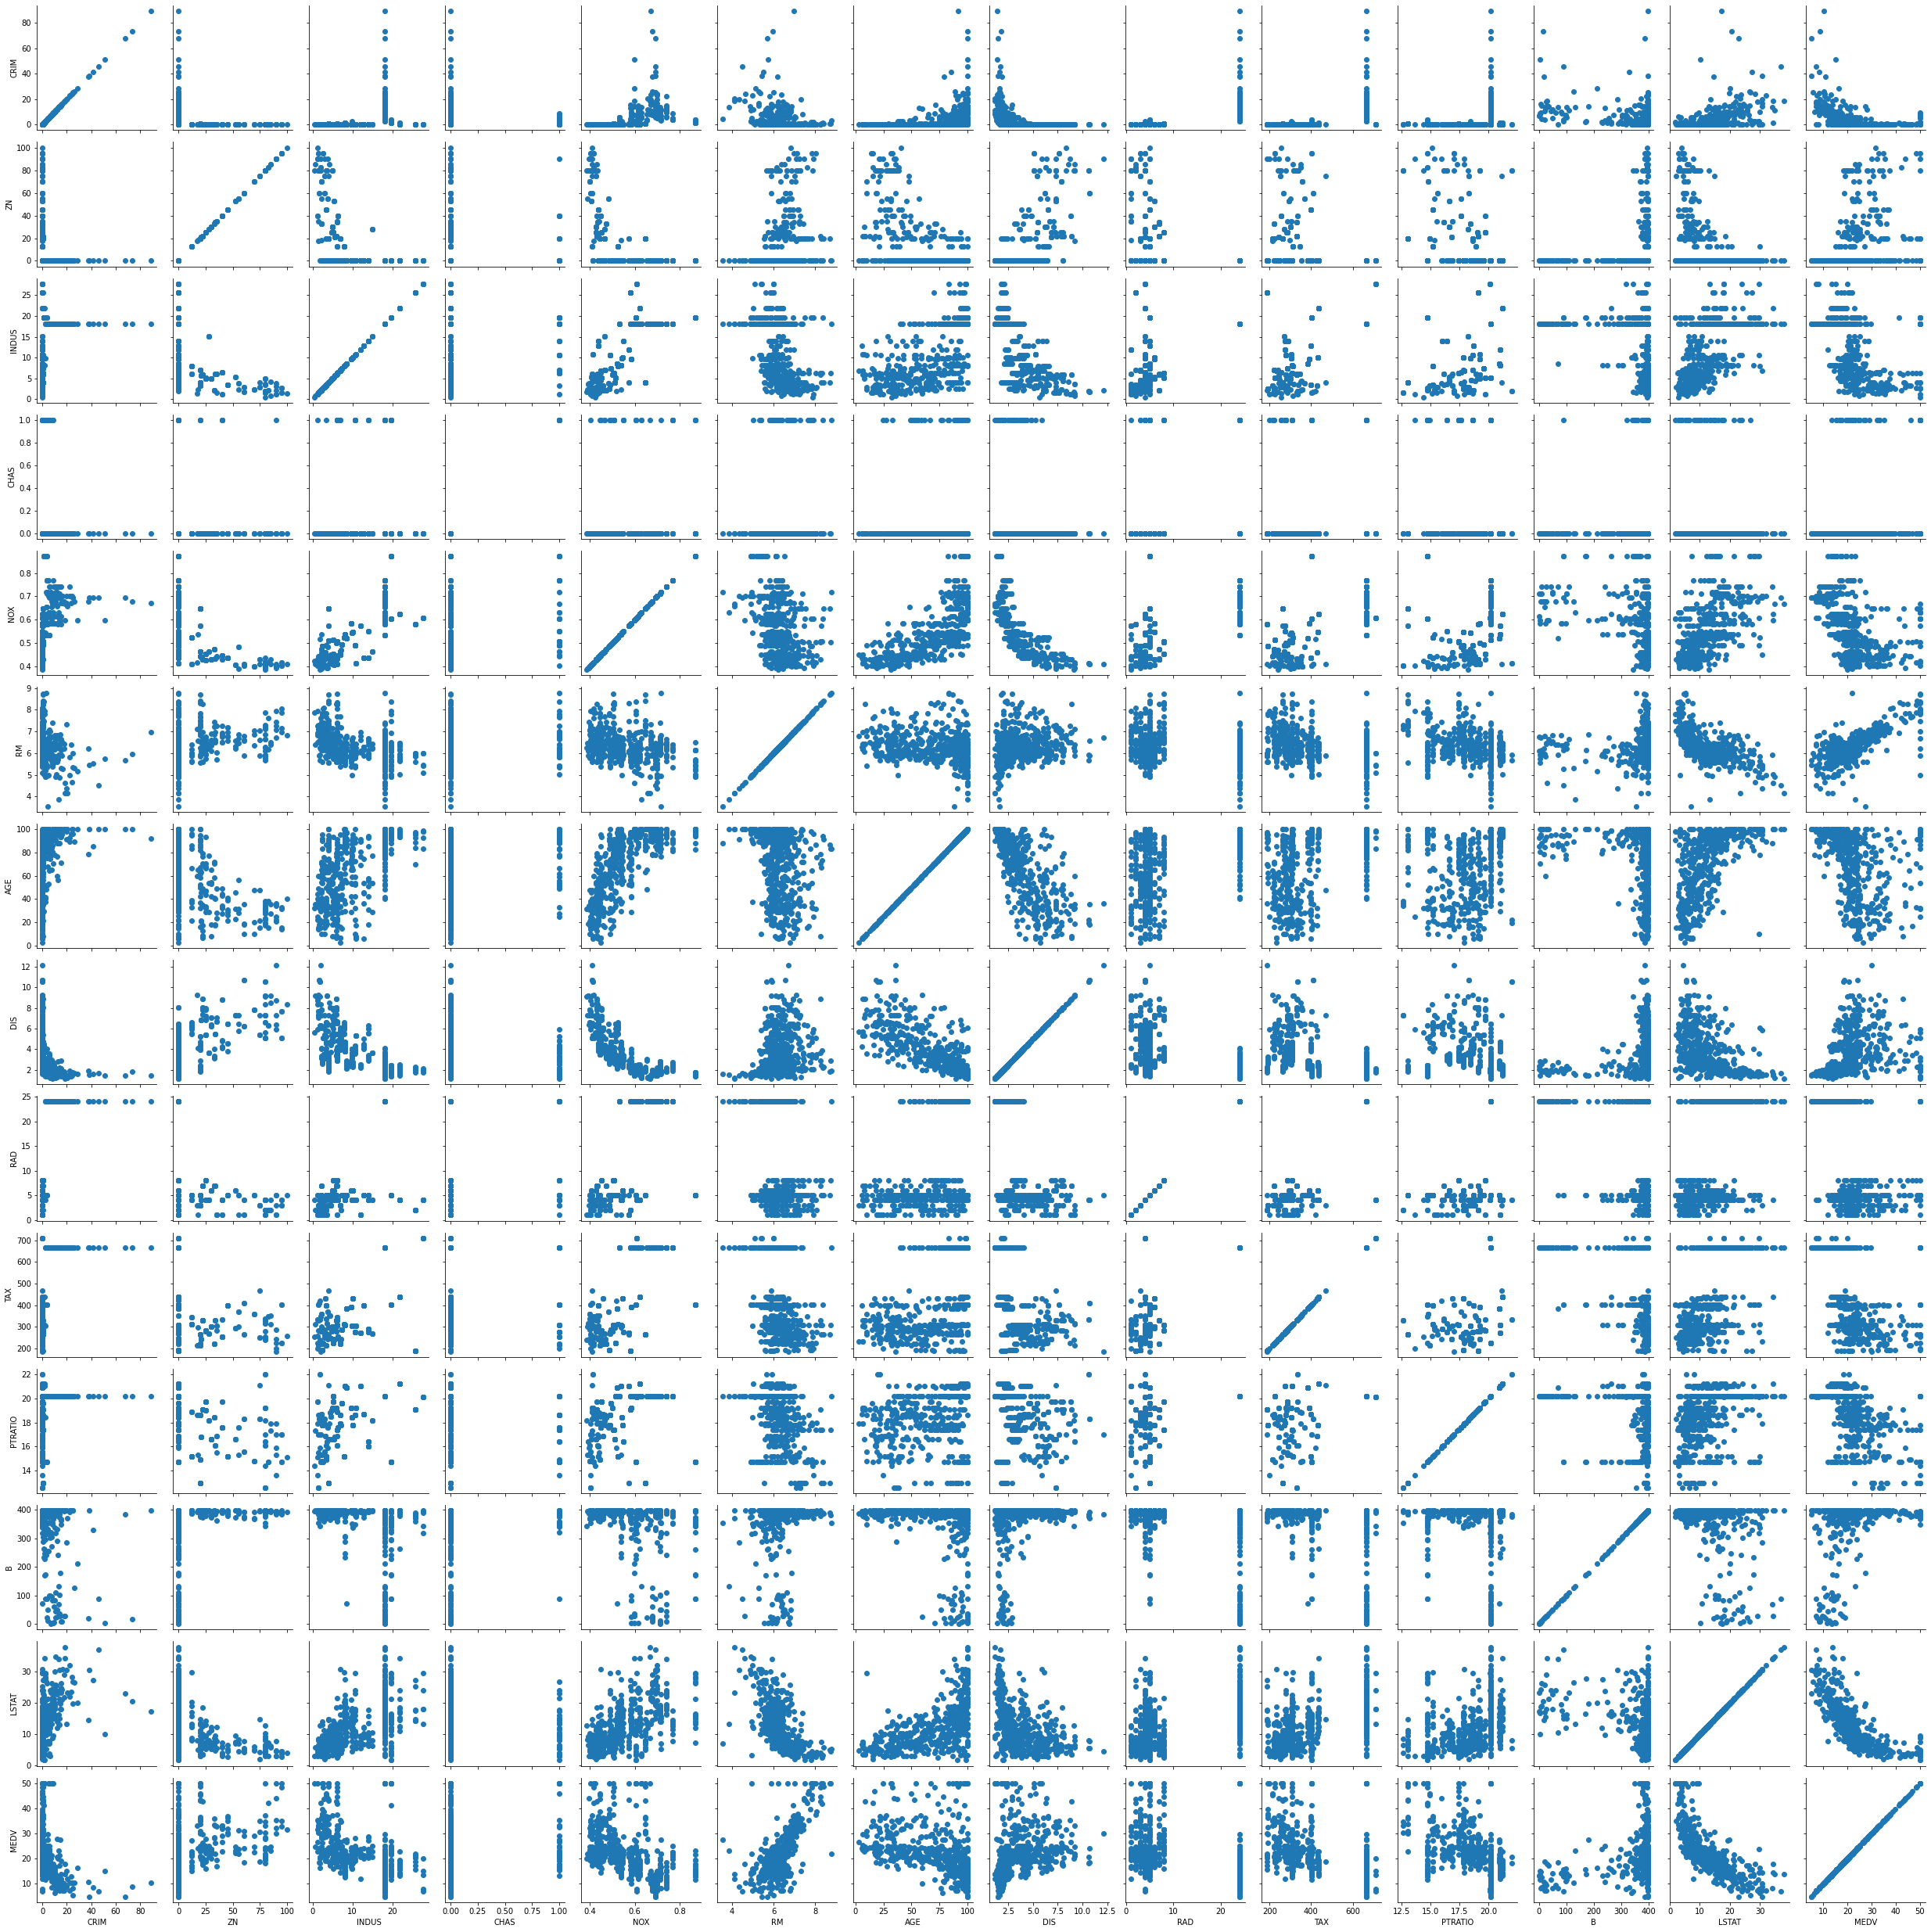

In [ ]:
g = sns.PairGrid(boston)
g.map(plt.scatter)

Observando a última linha, já podemos notar que algumas features, como RM e LSTAT, já aparentam possuir uma relação linear com o MEDV, ou valor médio das casas. Iremos aprofundar nossa análise da relação entre variáveis mais tarde, na análise exploratória dos dados. 

# Separando os Conjuntos de Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(boston,test_size=0.2,random_state = seed)

Antes de iniciarmos nossa análise exploratória, devemos separar os conjuntos de treino e teste, sendo que esse último ficará reservado apenas para o teste final. Toda a análise de dados, treino e validação de modelos deve ser feita apenas no conjunto de treino, para evitar colocar um viés de bisbilhotamento em nosso modelo.

# Análise Exploratória dos Dados

Para analisar os dados, vamos iniciar utilizando a correlação entre as colunas de nosso DataFrame. Aqui, optei por mostrar os resultados através de um heatmap do Seaborn, por ser uma maneira mais visual de entender a correlação.

In [ ]:
corr = train_set.corr()

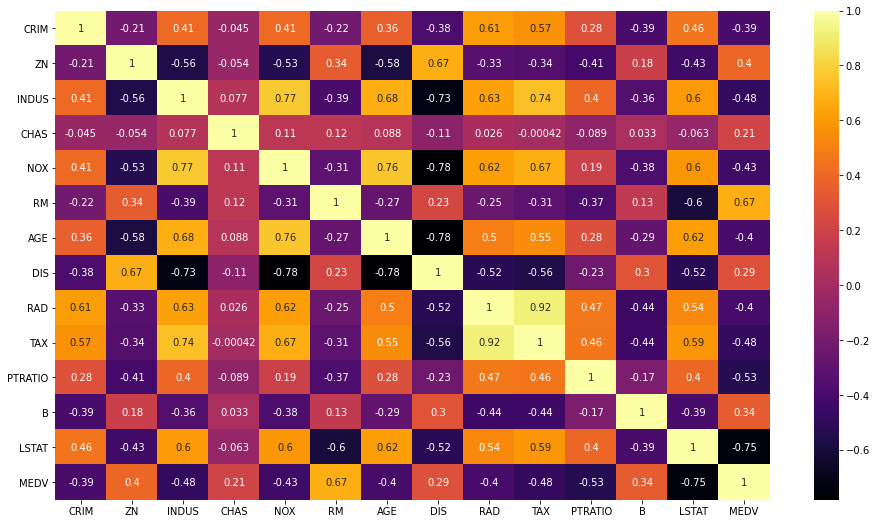

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,cmap='inferno',annot=True)

Abaixo, podemos observar os valores de correlação com o valor médio das casas, dispostos em ordem crescente. Como tínhamos observado no PairGrid, LSTAT e RM tem forte correlação (negativa e positiva, respectivamente) com o MEDV. Entretanto, diversas outras features também apresentam correlações significativas com o label. Assim, não descartarei nenhuma feature, visto que todas elas podem ser importantes para a explicação dos valores médios.

In [ ]:
corr['MEDV'].sort_values()

LSTAT     -0.745645
PTRATIO   -0.533662
INDUS     -0.483926
TAX       -0.479574
NOX       -0.428147
RAD       -0.404052
AGE       -0.399495
CRIM      -0.390682
CHAS       0.209914
DIS        0.285220
B          0.339848
ZN         0.400364
RM         0.674747
MEDV       1.000000
Name: MEDV, dtype: float64

# Preparando os Dados

O próximo passo é garantir que nossos dados estão em sua melhor forma para podermos treinar adequadamente alguns modelos. Para isso, iniciamos separando nossas features (x_train) dos labels (y_train).

In [ ]:
y_train = train_set['MEDV']
x_train = train_set.drop('MEDV',axis=1)

Utilizaremos também um pipeline para escalar e preencher dados faltantes. O Scaler é importante, uma vez que dados fora de escala podem afetar negativamente o modelo. Já o Imputer é utilizado mesmo sem termos dados faltantes no dataset uma vez que é possível que, em uma utilização futura do modelo, sejam fornecidos dados incompletos. Se não garantirmos que esses dados sejam preenchidos, podemos estar inserindo um viés em nosso modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

x_train_adj = pipeline.fit_transform(x_train)

In [ ]:
x_train_adj

array([[-0.3329532 , -0.50438138, -0.44258338, ...,  1.13854528,
        -0.73483087, -0.10369477],
       [-0.41673658,  0.35385601, -0.80924283, ..., -0.76798155,
         0.44191192, -1.03804449],
       [-0.41487774, -0.50438138, -1.04243825, ..., -0.85876854,
         0.4018911 , -0.3340025 ],
       ...,
       [-0.41501531, -0.50438138,  2.12549946, ...,  0.27606886,
         0.3573993 ,  0.2869538 ],
       [-0.41198993,  1.1303565 , -0.69631172, ..., -0.40483358,
         0.44191192, -1.37330259],
       [-0.41549959,  2.35640991, -1.30789969, ..., -1.67585147,
         0.1293788 , -1.08323145]])

# Treinando Diferentes Modelos

Agora, chega a hora de treinar alguns modelos e validá-los. Inicia-se com um modelo mais simples, de regressão linear.

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train_adj,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos medir o erro no conjunto de treinamento utilizando a métrica do Erro Absoluto Médio (Mean Absolute Error ou MAE).

In [ ]:
from sklearn.metrics import mean_absolute_error

linear_pred = linear.predict(x_train_adj)
MAE_lin = mean_absolute_error(y_train,linear_pred)
MAE_lin

3.2520690264178

Entretanto, não é suficiente calcular o erro apenas no conjunto de treinamento. Para verificar melhor como nosso modelo está performando, utiliza-se a técnica da validação cruzada.

In [ ]:
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(linear,x_train_adj,y_train,
                            scoring='neg_mean_absolute_error',cv=10)
-lin_score.mean()

3.427695630605971

A seguir, faremos o mesmo procedimento para um modelo de Regressão Polinomial, para verificar se um polinômio de grau 2 pode representar melhor nossos dados. Note que é necessário efetuar uma tranformação nas features, para elevá-las ao quadrado.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polinomio = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = polinomio.fit_transform(x_train_adj)

In [ ]:
pol = LinearRegression()
pol.fit(x_train_poly,y_train)
pol_pred = pol.predict(x_train_poly)
MAE_pol = mean_absolute_error(y_train,pol_pred)
MAE_pol

1.6317982397099153

In [ ]:
pol_score = cross_val_score(pol,x_train_poly,y_train,
                            scoring='neg_mean_absolute_error',cv=10)
-pol_score.mean()

2.422056523331646

Verifica-se que o polinômio de grau 2 teve um desempenho melhor, tanto no conjunto de treinamento quanto no de validação. Vejamos se um polinômio de grau 3 pode ter uma performance ainda melhor:

In [ ]:
polinomio3 = PolynomialFeatures(degree=3,include_bias=False)
x_train_pol3 = polinomio3.fit_transform(x_train_adj)
pol3 = LinearRegression()
pol3.fit(x_train_pol3,y_train)
pol3_pred = pol3.predict(x_train_pol3)
MAE_pol3 = mean_absolute_error(y_train,pol3_pred)
MAE_pol3

7.323631250399261e-12

In [ ]:
pol3_score = cross_val_score(pol3,x_train_pol3,y_train,
                            scoring='neg_mean_absolute_error',cv=10)
-pol3_score.mean()

34.53855187257726

Algo curioso aconteceu: o erro no conjunto de treinamento foi muito próximo de zero, enquanto o erro no conjunto de validação foi elevado. Isso é um sinal de que o modelo está se sobreajustando aos dados. Ou seja, nosso polinômio interpola os pontos do conjunto de treinamento, mas não é capaz de generalizar para o conjunto de validação.

A seguir, vamos tentar outros dois modelos: Decision Tree e Random Forest

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree_score = cross_val_score(tree,x_train_adj,y_train,
                             scoring='neg_mean_absolute_error',cv=10)
-tree_score.mean()

3.3517073170731715

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=seed)
forest_score = cross_val_score(forest,x_train_adj,y_train,
                             scoring='neg_mean_absolute_error',cv=10)
-forest_score.mean()

2.334841646341464

Percebeu-se que, entre todos os modelos, os que performaram melhor no conjunto de validação foram a Regressão Polinomial de Grau 2 e a Random Forest. Optei por seguir com o modelo do Random Forest, uma vez que ele desempenhou ligeiramente melhor e porque acredito que serei capaz de melhorar seu desempenho ajustando alguns hiperparâmetros.

# Melhorando o Modelo

Chegou a hora de fazer alguns ajustes finos no modelo, testando diferentes hiperparâmetros para melhorar a performance. Para fazer isso, vamos utilizar o GridSearch, testando alguns valores para o número de estimadores (ou simplesmente de árvores em nossa floresta) e o número máximo de features. Aqui, optei por utilizar algumas potências de 10 para os estimadores, como não tinha nenhuma referência sobre qual número seria adequado nesse caso. Já para as features, coloquei algumas possibilidades de números entre 2 e 13, o número total de features no dataset.

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 100, 1000],'max_features': [2, 4, 6, 8, 10, 13]}]

forest_reg = RandomForestRegressor(random_state=seed)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_absolute_error', return_train_score=True)

grid_search.fit(x_train_adj,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=18,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

Vejamos quais foram os melhores parâmetros:

In [28]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 1000}

# Aplicando e Testando o Modelo

A última etapa é aplicar nosso modelo no conjunto de teste. Para isso, vamos separar as features das labels no conjunto de teste, e aplicar a pipeline para ajustar as features de x_test. Em seguida, faremos as previsões sobre o conjunto ajustado. Por fim, calculamos o MAE final, entre as predições e o y_test. 

Utiliza-se essa métrica porque ela significa o erro que cometemos, em média, nas predições de cada casa. Por exemplo, se predizemos que a casa vale 20000 dólares, e nosso erro médio é de 2000 dólares, então é bastante razoável pensarmos que a casa vale entre 18000 e 22000 dólares. Assim podemos tomar a decisão de comprá-la ou não, por exemplo.

In [30]:
modelo = grid_search.best_estimator_
y_test = test_set['MEDV']
x_test = test_set.drop('MEDV',axis=1)
x_test_adj = pipeline.transform(x_test)
predictions = modelo.predict(x_test_adj)
MAE = mean_absolute_error(y_test,predictions)
MAE

2.1418352941176595

Chegamos ao fim do projeto! Agora, basta aplicar o modelo!